# Agent-Environment Interface



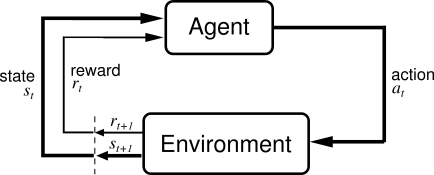

## Markov Decision Process (MDP)

An MDP is defined by a tuple:  **(S, A, P, R, γ)**

* **S**:  **State Space** - The set of all possible states an agent can be in.
* **A**:  **Action Space** - The set of all possible actions an agent can take.
* **P**:  **Transition Probability** -  `P(s'|s, a)`: The probability of transitioning to state `s'` when taking action `a` in state `s`.
* **R**:  **Reward Function** - `R(s, a, s')`: The reward received for transitioning to state `s'` by taking action `a` in state `s`.
* **γ**:  **Discount Factor** - A value between 0 and 1 that determines the importance of future rewards.


## Other Common Notations

* **s**: Current state
* **a**: Current action
* **s'**: Next state
* **r**: Reward
* **π**: Policy - A function that maps states to actions (determines the agent's behavior).
* **V(s)**: Value function - The expected cumulative reward starting from state `s` and following a policy `π`.
* **Q(s, a)**: Action-value function - The expected cumulative reward starting from state `s`, taking action `a`, and then following a policy `π`.



# Example

A Treasure Hunter agent is trapped in an m x n island from which it cannot escape. Its task is to dig for buried treasures that are spread across different locations on the island. The island also contains several traps which always incur damage to the agent whenever visited. At any location on the island (indicated by a cell), the agent can take possible actions among lef t, right, up, and down, but not all actions are valid in every cell, i.e., if the agent tries to go outside the island, it is considered as an invalid action. On visiting a cell, the agent tries to dig for a possible treasure which causes a small digging cost. If the agent finds the buried treasure, it earns a positive reward, whereas if the cell turns out to be a trap, it receives a negative reward. The cells containing treasure are assumed to have an infinite amount of buried treasure.


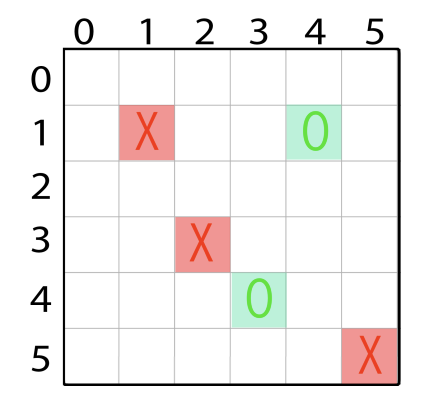

Above figure is a sample island. The X-marked red cells indicate traps, and 0 marked green cells indicate buried treasure.

- For the above island, indexing starts from 0 (starting from left), At cell (0,5), the agent has only two valid actions: lef t and down. If the agent decides to move down, he goes to (1,5) and will get a reward of -1 (digging cost).
- At state (1,5), valid actions are up, down, and left. if the agent decides to move left, it goes to (1,4), getting a reward of +5 (treasure reward).
- At (1,2) agent can take all four actions. On taking the action left, it goes to the state (1,1) and receives a reward -2 (trap).

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_grid(rows, columns, cell_size=1, line_width=1, border_width=3,
                error_states=None, goal_states=None, arrows=None, Q_values=None,
                save_path=None):
    """
    Create and display a grid with error and goal states, arrows, and optionally a second grid for Q-values.

    Args:
        rows (int): Number of rows in the grid.
        columns (int): Number of columns in the grid.
        cell_size (int, optional): Size of each cell. Default is 1.
        line_width (int, optional): Width of the grid lines. Default is 1.
        border_width (int, optional): Width of the outer border. Default is 3.
        error_states (list of tuples, optional): List of (row, col) indices for error states ('X').
        goal_states (list of tuples, optional): List of (row, col) indices for goal states ('O').
        arrows (dict of tuples to str, optional): Dictionary mapping (row, col) to arrow directions ('up', 'down', 'left', 'right').
        Q_values (dict of tuples to float, optional): Dictionary mapping (row, col) to Q-values.
        save_path (str, optional): Path to save the image (e.g., 'grid.png'). If None, the image won't be saved.
    """
    # Calculate the size of the grid
    width = columns * cell_size
    height = rows * cell_size

    # Create a figure and axis for both grids
    if Q_values is None:
        fig, ax2 = plt.subplots(figsize=(columns, rows))
        ax2.set_xlim(0, width)
        ax2.set_ylim(0, height)
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(columns * 2, rows))
        ax1.set_xlim(0, width)
        ax1.set_ylim(0, height)
        ax2.set_xlim(0, width)
        ax2.set_ylim(0, height)

    # Create a set of arrow locations for easy checking
    arrow_locations = set(arrows.keys()) if arrows else set()

    # Draw the colored cells for error and goal states (on ax2)
    if error_states:
        for state in error_states:
            x_start = state[1] * cell_size
            y_start = height - (state[0] + 1) * cell_size  # Flip the y-axis to match grid indexing
            rect = patches.Rectangle((x_start, y_start), cell_size, cell_size, color='red', alpha=0.3)
            ax2.add_patch(rect)
            if Q_values:  # Add the red cell to ax1 for Q-values grid
                rect_q = patches.Rectangle((x_start, y_start), cell_size, cell_size, color='red', alpha=0.3)
                ax1.add_patch(rect_q)
            if state not in arrow_locations:  # Skip if an arrow is already defined for this cell
                # Add 'X' label
                x_pos = state[1] * cell_size + cell_size / 2
                y_pos = height - (state[0] * cell_size + cell_size / 2)
                ax2.text(x_pos, y_pos, 'X', ha='center', va='center', fontsize=24, color='blue')

    if goal_states:
        for state in goal_states:
            x_start = state[1] * cell_size
            y_start = height - (state[0] + 1) * cell_size
            rect = patches.Rectangle((x_start, y_start), cell_size, cell_size, color='green', alpha=0.3)
            ax2.add_patch(rect)
            if Q_values:  # Add the red cell to ax1 for Q-values grid
                rect_q = patches.Rectangle((x_start, y_start), cell_size, cell_size, color='green', alpha=0.3)
                ax1.add_patch(rect_q)
            if state not in arrow_locations:  # Skip if an arrow is already defined for this cell
                # Add 'O' label
                x_pos = state[1] * cell_size + cell_size / 2
                y_pos = height - (state[0] * cell_size + cell_size / 2)
                ax2.text(x_pos, y_pos, 'O', ha='center', va='center', fontsize=24, color='blue')


    if arrows:
      for (row, col), directions in arrows.items():
          # Center of the cell
          x_center = col * cell_size + cell_size / 2  # Center x
          y_center = height - (row * cell_size + cell_size / 2)  # Center y

          # Arrow size scaling factor
          arrow_length = cell_size * 0.3

          for direction in directions:
              dx, dy = 0, 0

              # Define arrow directions
              if direction == "up":
                  dx, dy = 0, arrow_length
              elif direction == "down":
                  dx, dy = 0, -arrow_length
              elif direction == "left":
                  dx, dy = -arrow_length, 0
              elif direction == "right":
                  dx, dy = arrow_length, 0


              # Draw the arrow starting from the center
              ax2.annotate("", xy=(x_center + dx, y_center + dy),  # Arrow tip
                           xytext=(x_center, y_center),       # Arrow base
                           arrowprops=dict(facecolor='black',      # Arrow color
                                           edgecolor='black',      # Outline color
                                           shrinkA=0,              # No shrinking at the arrow base
                                           shrinkB=0,              # No shrinking at the arrow tip
                                           width=1,                # Narrower tail width
                                           headwidth=5,            # Smaller head width
                                           headlength=5            # Smaller head length
                                           )
                            )

    # Display Q-values (on ax1)
    if Q_values:
        for (row, col), q_value in Q_values.items():
            x_pos = col * cell_size + cell_size / 2
            y_pos = height - (row * cell_size + cell_size / 2)
            ax1.text(x_pos, y_pos, f'{q_value:.2f}', ha='center', va='center', fontsize=12, color='black')

        # Draw the grid lines for the Q-value grid (on ax1)
        for x in range(0, width + 1, cell_size):
            ax1.plot([x, x], [0, height], color='black', linewidth=line_width)
        for y in range(0, height + 1, cell_size):
            ax1.plot([0, width], [y, y], color='black', linewidth=line_width)

        # Draw the thicker outer border (on ax1)
        ax1.plot([0, width], [0, 0], color='black', linewidth=border_width)  # Bottom border
        ax1.plot([0, width], [height, height], color='black', linewidth=border_width)  # Top border
        ax1.plot([0, 0], [0, height], color='black', linewidth=border_width)  # Left border
        ax1.plot([width, width], [0, height], color='black', linewidth=border_width)  # Right border

    # Draw the inner grid lines (on ax2)
    for x in range(0, width + 1, cell_size):
        ax2.plot([x, x], [0, height], color='black', linewidth=line_width)
    for y in range(0, height + 1, cell_size):
        ax2.plot([0, width], [y, y], color='black', linewidth=line_width)

    # Draw the thicker outer border (on ax2)
    ax2.plot([0, width], [0, 0], color='black', linewidth=border_width)  # Bottom border
    ax2.plot([0, width], [height, height], color='black', linewidth=border_width)  # Top border
    ax2.plot([0, 0], [0, height], color='black', linewidth=border_width)  # Left border
    ax2.plot([width, width], [0, height], color='black', linewidth=border_width)  # Right border

    # Remove axes for both grids for a cleaner look
    if Q_values is not None:
        ax1.axis('off')
    ax2.axis('off')

    # Save or display the grids
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.show()


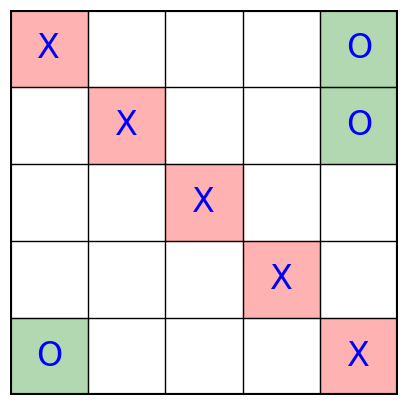

In [ ]:
import numpy as np
np.random.seed(100)

# RL environment
class gridworld:
    def __init__(self, dims, goal_states, error_states, finite_horizon=False):
        # for actions
        self.actions = ["up", "down", "right", "left"]
        self.action_map = {"up": 0, "down": 1, "right": 2, "left": 3}
        self.movement = [[-1, 0], [1, 0], [0, 1], [0, -1]]

        # for states
        self.rows = dims[0]
        self.columns = dims[1]
        # self.current_state = None
        self.error_states = error_states
        self.goal_states = goal_states
        self.empty_states = [(i, j) for i in range(self.rows) for j in range(self.columns) if (i, j) not in (self.goal_states + self.error_states)]

        # horizon type
        self.finite_horizon = finite_horizon

        # visual representation of gridworld
        self.grid = np.array([["." for i in range(self.columns)] for j in range(self.rows)])
        for g in self.goal_states:
            self.grid[g] = "O"
        for e in self.error_states:
            self.grid[e] = "X"

        # track terminal states
        self.terminal_states = set(goal_states)

    # print gridworld
    def print_grid(self):
        print(self.grid)

    # set current state to start state
    def reset(self, start_state=None):
        if start_state is not None:
            self.current_state = start_state
        else:
            self.current_state = self.empty_states[np.random.choice(len(self.empty_states))]
        return self.current_state

    def step(self, action):
        # If finite horizon and the agent is in a goal state, it stays there
        if self.finite_horizon and self.current_state in self.goal_states:
            return self.current_state, 0  # No reward, as it's terminal

        action_index = action
        action_taken = self.actions[action]

        new_state, reward = (-1, -1), 0

        # Handle invalid actions explicitly
        if (action_taken == "up" and self.current_state[0] == 0) or (action_taken == "down" and self.current_state[0] == self.rows - 1):
            # return self.current_state, -5
            return self.current_state, -2
        elif (action_taken == "left" and self.current_state[1] == 0) or (action_taken == "right" and self.current_state[1] == self.columns - 1):
            # return self.current_state, -5
            return self.current_state, -2

        # Inside the board
        new_state = (self.current_state[0] + self.movement[action_index][0], self.current_state[1] + self.movement[action_index][1])
        if new_state in self.empty_states:  # no reward in empty states
            reward = -1
        elif new_state in self.goal_states:  # good state
            reward = 5 # 10
        elif new_state in self.error_states:  # bad state
            reward = -2 # -5

        # Update current state after action
        self.current_state = new_state

        return self.current_state, reward

size = 5
goal_states = [(0, size - 1), (1, size - 1), (size - 1, 0)]
error_states = [(o, o) for o in range(size)]

grid = gridworld((size, size), goal_states, error_states, finite_horizon=False)
create_grid(rows=5, columns=5, cell_size=20, line_width=1, border_width=3,
            error_states=error_states, goal_states=goal_states, arrows=None,
            Q_values=None, save_path='grid_with_arrows_colored.png')

# Q-Learning

We'll implement the Q-Learning algorithm for the above problem.

**Recall Key Components:**

* **Q-table:** A table storing the estimated value (Q-value) for each state-action pair.
* **Learning Rate (α):** Controls how much the Q-values are updated with each experience. In this problem we will implement step size α as follows: At the nth iteration, `visit_n(s, a)` is the number of times the state action pair `(s,a)` is seen. So the step size `α = 1/visit_n(s, a)`.

\

**Recall Algorithm Steps:**

1. **Initialization:** Create a Q-table and initialize all Q-values to 0.
2. **Repeat for each episode:**
    * Initialize the starting state `s`.
    * **Repeat for each step of the episode:**
        * Choose an action `a` using an exploration-exploitation strategy (e.g., epsilon-greedy).
        * Take action `a`, observe reward `r` and next state `s'`.
        * Update the Q-value for the current state-action pair using the following update rule:

            `Q(s, a) = Q(s, a) + α * [r + γ * max(Q(s', a')) - Q(s, a)]`

         where `a'` represents all possible actions in the next state `s'`.
        * Update the current state to `s'`.
    * Until the episode terminates.
3. **Until convergence or a predefined number of episodes is reached.**

In [ ]:
class Solution:
    def __init__(self, env, gamma=0.9, epsilon=0.1, maxIter=5000, maxTimesteps=1000):
        self.q_table = {}
        self.env = env
        self.gamma, self.epsilon, self.maxIter, self.maxTimesteps = gamma, epsilon, maxIter, maxTimesteps

    def q_learning(self):
        q_table = np.zeros((self.env.rows, self.env.columns, len(self.env.actions)))

        for iter in range(self.maxIter):
            state = self.env.reset()
            visit_n = {}

            for _ in range(self.maxTimesteps):
                if np.random.uniform(0, 1) < self.epsilon:
                    action = np.random.choice(self.env.actions)
                else:
                    action = self.env.actions[np.argmax(q_table[state])]
                a = self.env.action_map[action]

                state_dash, reward = self.env.step(a)

                # Update rule for Q-learning
                if state_dash != state:  # Ensure valid transitions
                    best_next_action = np.argmax(q_table[state_dash])
                    visit_n[(state, a)] = visit_n.get((state, a), 0) + 1
                    alpha = 1 / visit_n[(state, a)]
                    q_table[state][a] = (1 - alpha) * q_table[state][a] + alpha * (
                        reward + self.gamma * q_table[state_dash][best_next_action]
                    )
                state = state_dash

        return q_table

Optimal Q function and optimal policy in the finite horizon case: 


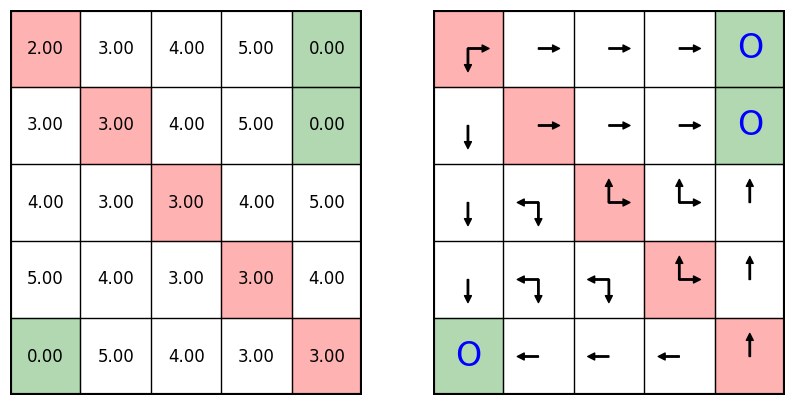

In [ ]:
size = 5
goal_states = [(0, size - 1), (1, size - 1), (size - 1, 0)]
error_states = [(o, o) for o in range(size)]
grid = gridworld((size, size), goal_states, error_states, finite_horizon=True)

solution = Solution(grid, gamma=1.0, epsilon=0.2)
q_table = solution.q_learning()

Q_star_dict = {}
pi_star_dict = {}
for i in range(grid.rows):
  for j in range(grid.columns):
    Q_star_dict[(i, j)] = np.max(q_table[i, j])
    # Find the indices where the values are approximately equal to the maximum value
    indices = np.argwhere(np.isclose(q_table[i, j], Q_star_dict[(i, j)], atol=1e-4))
    indices = [arr.item() for arr in indices]
    pi_star_dict[(i, j)] = [grid.actions[index] for index in indices]

for (i, j) in goal_states:
    pi_star_dict.pop((i, j))

print("Optimal Q function and optimal policy in the finite horizon case: ")
create_grid(rows=5, columns=5, cell_size=20, line_width=1, border_width=3,
            error_states=error_states, goal_states=goal_states, arrows=pi_star_dict,
            Q_values=Q_star_dict, save_path='grid_with_arrows_colored.png')


Optimal Q function and optimal policy in the infinite horizon case: 


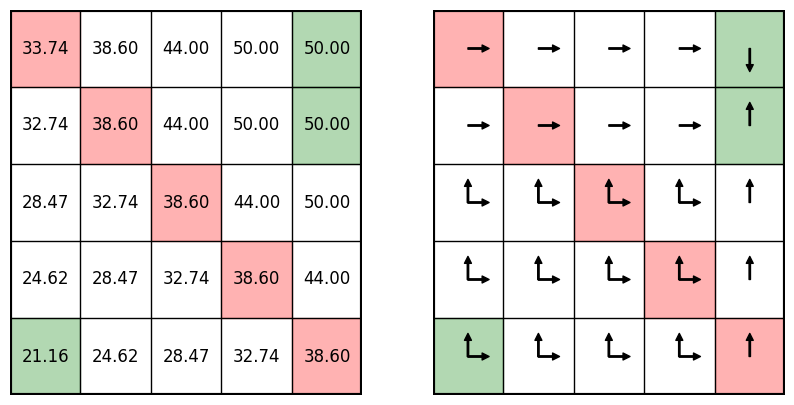

In [ ]:
grid = gridworld((size, size), goal_states, error_states, finite_horizon=False)
solution = Solution(grid, gamma=0.9, epsilon=0.2)
q_table = solution.q_learning()

Q_star_dict = {}
pi_star_dict = {}
for i in range(grid.rows):
  for j in range(grid.columns):
    Q_star_dict[(i, j)] = np.max(q_table[i, j])
    # Find the indices where the values are approximately equal to the maximum value
    indices = np.argwhere(np.isclose(q_table[i, j], Q_star_dict[(i, j)], atol=1e-3))
    indices = [arr.item() for arr in indices]
    pi_star_dict[(i, j)] = [grid.actions[index] for index in indices]

print("Optimal Q function and optimal policy in the infinite horizon case: ")
create_grid(rows=5, columns=5, cell_size=20, line_width=1, border_width=3,
            error_states=error_states, goal_states=goal_states, arrows=pi_star_dict,
            Q_values=Q_star_dict, save_path='grid_with_arrows_colored.png')